<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/JanechrisDataAnalyst/blob/main/Clustering_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient for 2 clusters: 0.7049437310743717
Silhouette Coefficient for 3 clusters: 0.8480303059596955


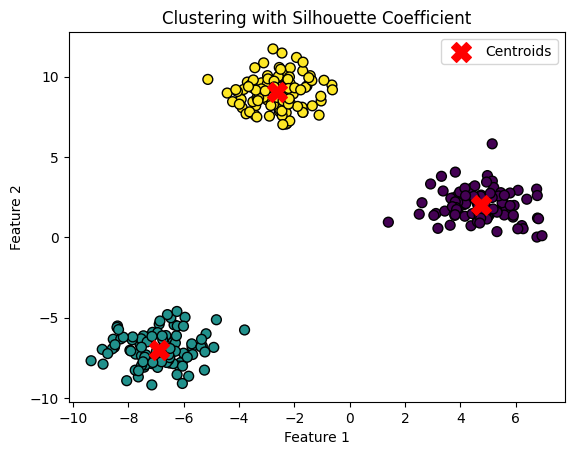

Silhouette Coefficient for 4 clusters: 0.6629719803670588
Silhouette Coefficient for 5 clusters: 0.501403768738471


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a hypothetical dataset with three well-separated clusters
data, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Try different values of k (number of clusters) and evaluate the Silhouette Coefficient for each
for k in range(2, 6):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_assignments = kmeans.fit_predict(data)

    # Calculate Silhouette Coefficient
    silhouette_avg = silhouette_score(data, cluster_assignments)
    print(f"Silhouette Coefficient for {k} clusters: {silhouette_avg}")

    # Visualize the clusters for k=3 as an example
    if k == 3:
        plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis', edgecolors='k', s=50)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
        plt.title("Clustering with Silhouette Coefficient")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

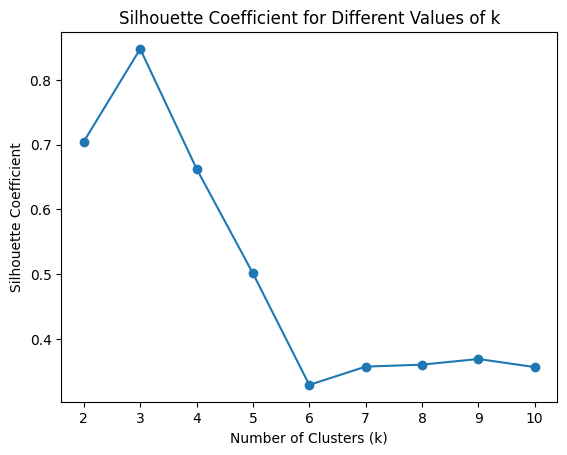

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a hypothetical dataset with three well-separated clusters
data, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Define a range of k values to try
k_values = range(2, 11)

# Store Silhouette Coefficients for each k
silhouette_scores = []

# Iterate over different values of k
for k in k_values:
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_assignments = kmeans.fit_predict(data)

    # Calculate Silhouette Coefficient
    silhouette_avg = silhouette_score(data, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Coefficients for different k values
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Coefficient for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate sample data
data, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Specify the number of clusters
n_clusters = 3

# Fit a clustering algorithm (e.g., K-means) to the data
clusterer = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = clusterer.fit_predict(X)

# Compute the silhouette scores for each sample
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Create a subplot with 1 row and 1 column
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# Set the y-axis limit for the silhouette plot
ax1.set_xlim([-0.1, 1])

# Initialize the vertical position for each sample
y_lower = 10

# Iterate over the clusters to plot the silhouette plot
for i in range(n_clusters):
    # Collect silhouette scores for samples in the current cluster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    # Sort the silhouette scores in ascending order
    ith_cluster_silhouette_values.sort()

    # Calculate the size of the current cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    # Update the y-axis limits for the silhouette plot
    y_upper = y_lower + size_cluster_i

    # Generate color for the current cluster
    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)

    # Fill the silhouette plot with the color
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plot with the cluster number at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Update the vertical position for the next cluster
    y_lower = y_upper + 10

# Set labels and title for the silhouette plot
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.set_title("Silhouette plot for the clustering")

# Add a vertical line at the average silhouette score
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Display the plot
plt.show()

NameError: name 'X' is not defined

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data with ground truth labels
X, true_labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Assume we have a clustering algorithm (e.g., KMeans) and we obtain predicted labels
kmeans = KMeans(n_clusters=4, random_state=42)
predicted_labels = kmeans.fit_predict(X)

# Calculate the Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index (ARI): {ari_score}")


In [ ]:
pip install scikit-learn!

from sklearn.metrics.cluster import variation_of_information
import numpy as np

# Define the two clusterings
clustering_u = np.array([0, 0, 1, 1, 1])  # Clustering U: {A, B}, {C, D, E}
clustering_v = np.array([0, 0, 0, 1, 1])  # Clustering V: {A, B, C}, {D, E}

# Calculate VI
vi_score = variation_of_information(clustering_u, clustering_v)

print(f"Variation of Information: {vi_score}")


In [ ]:
from sklearn.metrics.cluster import entropy, mutual_info_score

def variation_of_information(cluster_labels1, cluster_labels2):
    # Calculate entropy of each set of cluster assignments
    entropy1 = entropy(cluster_labels1)
    entropy2 = entropy(cluster_labels2)

    # Calculate mutual information between the cluster assignments
    mutual_info = mutual_info_score(cluster_labels1, cluster_labels2)

    # Calculate the Variation of Information
    variation_of_info = entropy1 + entropy2 - 2 * mutual_info

    return variation_of_info

# Example usage
cluster_labels1 = [0, 0, 1, 2, 2, 2]
cluster_labels2 = [1, 0, 1, 2, 2, 2]

vi = variation_of_information(cluster_labels1, cluster_labels2)
print("Variation of Information:", vi)